In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [2]:
signals = pd.read_csv("ioData/signals.csv", names=["#", "X", "Y", *["v" + str(i) for i in range(1, 5001)], "K", *["p" + str(i) for i in range(1, 5)]])
signals.head(5);

In [3]:
admin_data = pd.read_csv("ioData/admin_data.csv", names=["#", "X", "Y", *["v" + str(i) for i in range(1, 5001)], "K", *["p" + str(i) for i in range(1, 5)]])
admin_data.head(5);

In [4]:
y = admin_data.iloc[:, 3:5003]
pointsY = admin_data.iloc[:, 5004:5008]
rollMeanY = y.rolling(10, center=True, axis=1).mean()

In [5]:
def plotSignal(y, pointX=None, pointY=None, signalClass=None, drawTitels=False):
    x = np.arange(len(y))
    plt.plot(x, y)

    if not pointX is None and not pointY is None:
        plt.plot(pointX, pointY, "ro")

    if drawTitels:
        plt.title(label="signal", loc="center")

        if not signalClass is None:
            plt.title(label="class = " + str(signalClass), loc="right")


In [6]:
def plotSignals(tableOfData, numberOfSignal, drawTitels=False):
    x = np.arange(5000)
    y = admin_data.iloc[numberOfSignal, 3:5003]
    plt.plot(x, y)

    pointX = tableOfData.iloc[numberOfSignal, 5004:5008]
    pointY = [tableOfData.iloc[numberOfSignal, 3 + int(i)] for i in pointX]
    # print(x)
    # print(y)

    plt.plot(pointX, pointY, "ro")

    if drawTitels:
        plt.title(label="# = " + str(int(tableOfData.iloc[numberOfSignal]["#"])), loc="left")
        plt.title(label="signal", loc="center")
        plt.title(label="class = " + str(int(tableOfData.iloc[numberOfSignal]["K"])), loc="right")


In [7]:
numberOfSignal = 500

In [8]:
print(admin_data["K"].unique())
# print(admin_data["K"].value_counts())

[0 1 2 3 4 5 6 7 8]


Rolling window for signalClass

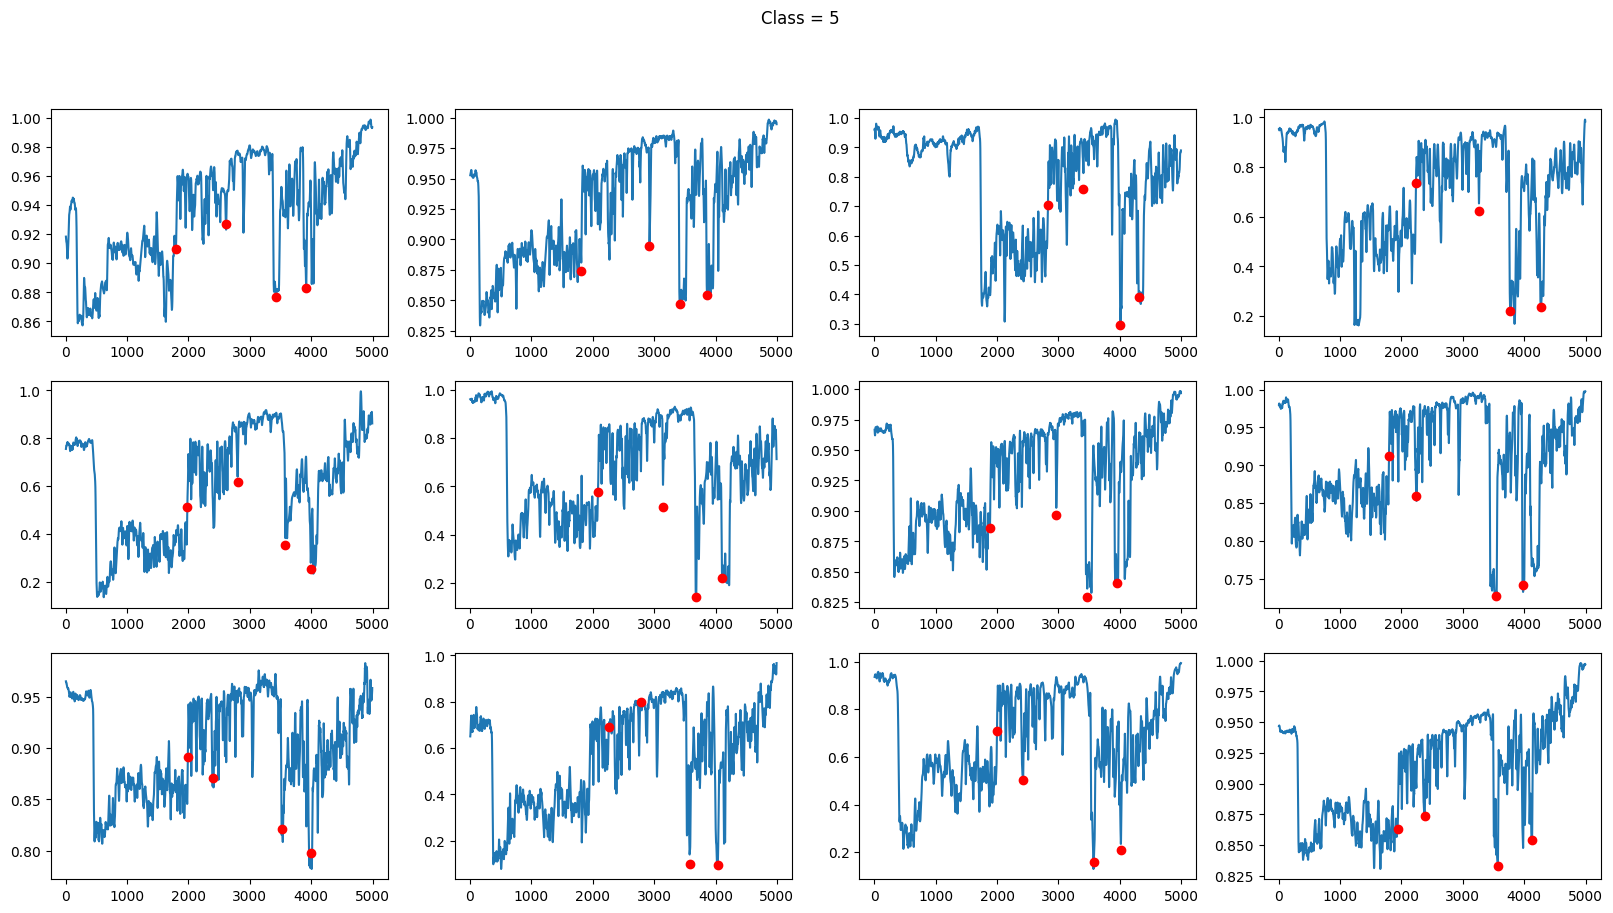

In [14]:
signalClass = 5

plt.figure(figsize=(20, 10))
plt.suptitle('Class = ' + str(signalClass))
for i, item in enumerate(admin_data[admin_data["K"] == signalClass].index[:12]):

    plt.subplot(3, 4, i + 1)
    plotSignal(rollMeanY.iloc[item], pointsY.iloc[item], y.iloc[item, pointsY.iloc[item]], admin_data.iloc[item]["K"])
    # plotSignal(y.loc[item])

# plt.clf()
plt.show()
# admin_data[admin_data["K"] == signalClass]["#"]

FFT for signalClass

In [10]:
# plt.figure(figsize=(20, 10))
# plt.suptitle('Class = ' + str(signalClass))
# for i, item in enumerate(admin_data[admin_data["K"] == signalClass].index[:12]):
#
#     plt.subplot(3, 4, i + 1)
#     plotSignal(np.abs(rfft(y.iloc[item, 5:-4].to_numpy())), signalClass=admin_data.iloc[item]["K"])
#     # plotSignal(y.loc[item])
#
# # plt.clf()
# plt.show()